In [1]:
# Importing modules
import pandas as pd

papers = pd.read_csv('../../data/papers.csv')# Print head
papers.head()

/Users/shionguha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [2]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
550,1998,Adding Constrained Discontinuities to Gaussian...,Abstract Missing,Adding Constrained Discontinuities to Gaussian...
4289,2013,Dropout Training as Adaptive Regularization,Dropout and other feature noising schemes cont...,Dropout Training as Adaptive Regularization\nS...
2071,2005,Large-Scale Multiclass Transduction,Abstract Missing,Large-Scale Multiclass Transduction\n\nThomas ...
2913,2009,Manifold Embeddings for Model-Based Reinforcem...,Interesting real-world datasets often exhibit ...,Manifold Embeddings for Model-Based\nReinforce...
3441,2010,"Online Learning: Random Averages, Combinatoria...",We develop a theory of online learning by defi...,"Online Learning: Random Averages, Combinatoria..."


In [3]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

550     adding constrained discontinuities to gaussian...
4289    dropout training as adaptive regularization\ns...
2071    large-scale multiclass transduction\n\nthomas ...
2913    manifold embeddings for model-based\nreinforce...
3441    online learning: random averages combinatorial...
Name: paper_text_processed, dtype: object

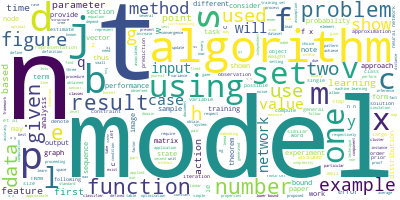

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['adding', 'constrained', 'discontinuities', 'gaussian', 'process', 'models', 'wind', 'fields', 'ian', 'nabney', 'christopher', 'williams', 'neural', 'computing', 'research', 'group', 'aston', 'university', 'birmingham', 'et', 'uk', 'dcomford', 'astonacuk', 'dan', 'cornford', 'abstract', 'gaussian', 'processes', 'provide', 'good']


In [6]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 4), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 5), (13, 2), (14, 3), (15, 16), (16, 5), (17, 3), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 7), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2)]


In [7]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"algorithm" + 0.006*"learning" + 0.005*"problem" + 0.004*"function" + '
  '0.004*"model" + 0.004*"set" + 0.004*"data" + 0.004*"using" + 0.003*"time" + '
  '0.003*"log"'),
 (1,
  '0.005*"learning" + 0.005*"one" + 0.005*"set" + 0.005*"algorithm" + '
  '0.004*"model" + 0.004*"data" + 0.004*"time" + 0.003*"function" + '
  '0.003*"figure" + 0.003*"two"'),
 (2,
  '0.005*"model" + 0.005*"algorithm" + 0.005*"learning" + 0.005*"number" + '
  '0.004*"log" + 0.004*"function" + 0.003*"one" + 0.003*"using" + 0.003*"data" '
  '+ 0.003*"time"'),
 (3,
  '0.007*"model" + 0.006*"learning" + 0.005*"data" + 0.004*"function" + '
  '0.004*"one" + 0.004*"training" + 0.004*"using" + 0.004*"figure" + '
  '0.004*"algorithm" + 0.004*"set"'),
 (4,
  '0.007*"algorithm" + 0.005*"model" + 0.005*"learning" + 0.004*"set" + '
  '0.004*"function" + 0.004*"one" + 0.004*"using" + 0.003*"time" + '
  '0.003*"data" + 0.003*"problem"'),
 (5,
  '0.007*"learning" + 0.005*"algorithm" + 0.005*"model" + 0.005*"set" +

In [8]:
#calculating model perplexity

perplexity = lda_model.log_perplexity(corpus)

In [9]:
#printing model perplexity

print(perplexity)

-8.847953449750651


In [10]:
import re
import string
#nmf demo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
df = pd.read_csv('../data/inaug_speeches.csv', encoding="latin1")

In [11]:
df.head(20)

,Unnamed: 0,Name,Inaugural Address,Date,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CA...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,James Madison,First Inaugural Address,"Saturday, March 4, 1809",UNWILLING to depart from example...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,James Madison,Second Inaugural Address,"Thursday, March 4, 1813",ABOUT to add the solemnity of an...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,James Monroe,First Inaugural Address,"Tuesday, March 4, 1817",I SHOULD be destitute of feeling...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not at...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,John Quincy Adams,Inaugural Address,"Friday, March 4, 1825",IN compliance with an usage coev...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Select Rows that are first term inaugural addresses
df = df.drop_duplicates(subset=['Name'], keep='first')# Clean Up Index
df = df.reset_index()# Select only President's Names and their Speeches
df = df[['Name', 'text']]# Set Index to President's Names
df = df.set_index('Name')# Visually Inspect
df.head()

,text
Name,
George Washington,Fellow-Citizens of the Senate and o...
John Adams,"WHEN it was first perceived, in ..."
Thomas Jefferson,Friends and Fellow-Citizens: CA...
James Madison,UNWILLING to depart from example...
James Monroe,I SHOULD be destitute of feeling...


In [13]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation, remove read errors,
    and remove words containing numbers.'''    
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)    
    
    return text

In [14]:
round1 = lambda x: clean_text_round1(x)

# Clean Speech Text
df["text"] = df["text"].apply(round1)

# Visually Inspect
df.head()

,text
Name,
George Washington,fellow citizens of the senate and o...
John Adams,when it was first perceived in ...
Thomas Jefferson,friends and fellow citizens ca...
James Madison,unwilling to depart from example...
James Monroe,i should be destitute of feeling...


In [15]:
# Noun extract and lemmatize function

def nouns(text):
    #Given a string of text, tokenize the text 
    #and pull out only the nouns.   
    
    # create mask to isolate words that are nouns
    is_noun = lambda pos: pos[:2] == 'NN'    
    
    # store function to split string of words 
    # into a list of words (tokens)
    tokenized = word_tokenize(text)    
    
    # store function to lemmatize each word
    wordnet_lemmatizer = WordNetLemmatizer()    
    
    # use list comprehension to lemmatize all words 
    # and create a list of all nouns
    all_nouns = [wordnet_lemmatizer.lemmatize(word) \
    for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    
    #return string of joined list of nouns
    return ' '.join(all_nouns)

# Create dataframe of only nouns from speeches
data_nouns = pd.DataFrame(df.text.apply(nouns))

# Visually Inspect
data_nouns.head()


,text
Name,
George Washington,citizen senate house representative vicissitud...
John Adams,time course america submission legislature ind...
Thomas Jefferson,friend citizen duty executive office country i...
James Madison,example authority i myself occasion profound i...
James Monroe,i destitute i proof fellow citizen confidence ...


In [16]:
# Add additional stop words since we are recreating the document-term matrix
stop_noun = ["america", 'today', 'thing']
stop_words_noun_agg = text.ENGLISH_STOP_WORDS.union(stop_noun)

# Create a document-term matrix with only nouns

# Store TF-IDF Vectorizer
tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = .8, min_df = .01)


# Fit and Transform speech noun text to a TF-IDF Doc-Term Matrix
data_tv_noun = tv_noun.fit_transform(data_nouns.text)

# Create data-frame of Doc-Term Matrix with nouns as column names
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())

# Set President's Names as Index
data_dtm_noun.index = df.index

# Visually inspect Document Term Matrix
data_dtm_noun.head()


,abandonment,abeyance,ability,abode,abraham,absence,absent,absolute,abstraction,abundance,...,wrongdoing,wrought,year,yes,yesterday,york,yorktown,youth,zeal,zone
Name,,,,,,,,,,,,,,,,,,,,,
George Washington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.027214,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
John Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.089376,0.0,0.0,0.0,0.0,0.0,0.037734,0.000000
Thomas Jefferson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.049273,0.000000
James Madison,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
James Monroe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.030786,0.0,0.0,0.0,0.0,0.0,0.032494,0.049596


In [17]:
def display_topics(model, feature_names, num_top_words,topic_names=None):
#'''Given an NMF model, feature_names, and number of top words, print topic number 
#and its top feature names, up to specified number of top words.'''    
    
    # iterate through topics in topic-term matrix, 'H' aka
    # model.components_
    for ix, topic in enumerate(model.components_):        
        
        #print topic, topic number, and top words
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [18]:
nmf_model = NMF(2)

# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
doc_topic = nmf_model.fit_transform(data_dtm_noun)

# Extract top words from the topic-term matrix 'H' 
display_topics(nmf_model, tv_noun.get_feature_names(), 5)


Topic  0
constitution, union, principle, congress, peace

Topic  1
american, freedom, man, peace, child


In [19]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(data_dtm_noun)
display_topics(nmf_model, tv_noun.get_feature_names(), 5)


Topic  0
principle, peace, confidence, difficulty, happiness

Topic  1
american, child, job, generation, woman

Topic  2
business, congress, policy, party, method

Topic  3
union, constitution, territory, question, opinion

Topic  4
community, purpose, story, ideal, ballot

Topic  5
constitution, measure, executive, officer, care

Topic  6
problem, republic, responsibility, task, regard

Topic  7
peace, freedom, man, strength, faith


/Users/shionguha/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [27]:
#github example here: https://github.com/gregversteeg/corex_topic
import numpy as np
import scipy.sparse as ss
from corextopic import corextopic as ct

# Define a matrix where rows are samples (docs) and columns are features (words)
X = np.array([[0,0,0,1,1],
              [1,1,1,0,0],
              [1,1,1,1,1]], dtype=int)
# Sparse matrices are also supported
X = ss.csr_matrix(X)
# Word labels for each column can be provided to the model
words = ['dog', 'cat', 'fish', 'apple', 'orange']
# Document labels for each row can be provided
docs = ['fruit doc', 'animal doc', 'mixed doc']

# Train the CorEx topic model
topic_model = ct.Corex(n_hidden=2)  # Define the number of latent (hidden) topics to use.
topic_model.fit(X, words=words, docs=docs)

In [24]:
topics = topic_model.get_topics()
for topic_n,topic in enumerate(topics):
    # w: word, mi: mutual information, s: sign
    topic = [(w,mi,s) if s > 0 else ('~'+w,mi,s) for w,mi,s in topic]
    # Unpack the info about the topic
    words,mis,signs = zip(*topic)    
    # Print topic
    topic_str = str(topic_n+1)+': '+', '.join(words)
    print(topic_str)

1: dog, cat, fish
2: apple, orange


In [25]:
top_docs = topic_model.get_top_docs()
for topic_n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    topic_str = str(topic_n+1)+': '+', '.join(docs)
    print(topic_str)

1: animal doc, mixed doc, fruit doc
2: fruit doc, mixed doc, animal doc
